## Sorting algorythms

In [1]:
row = 'sphynx of black quartz, judge my vow!'

### Insert sort

In [2]:
def ns(a):
    if len(a)<=1: return a
    for i in range(1,len(a)):
        j = i
        while a[j]<a[j-1] and j>=1:
            a[j-1],a[j] = a[j],a[j-1]
            j -= 1
    return a

''.join(ns(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

### Select sort

In [3]:
def ss(a):
    for i in range(len(a)):
        m = a[i]           # Current minimum
        c = i
        for j in range(i+1,len(a)):
            if a[j]<m:     # Find smallest element
                m = a[j]
                c = j                
        if c>i:
            (a[i],a[c]) = (a[c],a[i])
    return a

''.join(ss(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

### Quicksort

In [4]:
def qs(a):
    if len(a)<=1:  return a
    if len(a)<3:   p = len(a)-1     # Last element will be our pivot element
    else:                           # smart pivot: median of three
        m = len(a) // 2
        if a[1]<=a[m] and a[m]<=a[-1]:  p = m
        if a[1]<=a[-1] and a[-1]<=a[m]: p = len(a)-1
        else:                           p = 0
    a[p],a[-1] = a[-1],a[p]    # Hide pivot element at the end
        
    l = 0                       # pointer to where small values will be shoved
    for r in range(0,len(a)-1): # For each non-pivot
        if a[r]<a[-1]:          # If smaller than pivot,
            if r>l:             # and cannot be left in place,
                (a[r],a[l]) = (a[l],a[r]) # Swap (shove it to the left)
            l += 1              # Point to the next shoving point

    # By the end of this, all a<pivot are in locations<l
    # and all a>pivot (if any) are in l to n-1    
    (a[l],a[-1]) = (a[-1],a[l]) # Move pivot to its rightful place in the middle
    a = qs(a[:l]) + [a[l]] + qs(a[(l+1):]) # Do recursion on both halves
    return a

''.join(qs(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

Footnote: actually choosing pivot smartly is a heuristic trick that helps to improve average performance of this algorithm. This version is the simplest and it works, but one can also try smarter approaches. Ideal pivot is ~median(array).

The best thing about quisort is that it's happening in-place, and so is light on memory, yet is also fast.

### Mergesort

In [26]:
def ms(a):
    """A not-in-place version of mergesort.
    To make it in-place, instead of appending to o, add another counter,
    and copy right into a."""
    if len(a)<=1:
        return a
    mid = len(a) // 2
    al = ms(a[:mid])
    ar = ms(a[mid:])
    i = j = 0
    o = []
    while (i<len(al)) or (j<len(ar)):
        if i>=mid:           # Left array is over, draw from the right
            o.append(ar[j])
            j += 1
        elif j>=len(ar):     # Right array is over, draf from the left
            o.append(al[i])
            i += 1
        elif al[i]<ar[j]:    # Both are fine: compare
            o.append(al[i])
            i += 1
        else:
            o.append(ar[j])
            j += 1
    return o
    
''.join(ms(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

# Testing

....................................................................................................

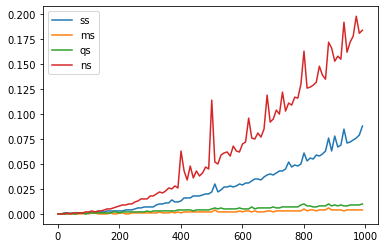

In [24]:
import matplotlib.pyplot as plt
import time
import numpy as np

def tester(nTrials=2,nmin=1,nmax=10,nstep=1):
    x = y = np.array([])
    flist = [ss, ms, qs, ns] # List of functions
    for i in range(nmin,nmax,nstep):
        print('.',end='')
        x = np.append(x,i)

        newRow = []
        for f in flist:
            t = 0
            for j in range(nTrials):
                task = np.random.randint(0,i,i)
                tic = time.time()
                f(task)
                t += time.time()-tic
            newRow.append(t/nTrials)
        y = np.append(y,newRow)
    y = y.reshape([-1,4])
    return x,y

x,y = tester(1,1,1000,10)
plt.plot(x,y);
plt.legend(['ss','ms','qs','ns']);

Not surprisingly, insert search (ns) is pretty bad. Merge sort wins. But what about very short arrays? See below.

.................................................

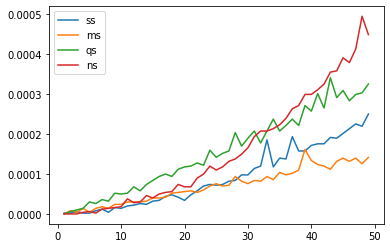

In [20]:
x,y = tester(500,1,50,1)
plt.plot(x,y);
plt.legend(['ss','ms','qs','ns']);

For arrays below 30-40 all other searches are worse than quick search. And for arrays of <15, insert search actually works quite well. Let's zoom some further.

...................

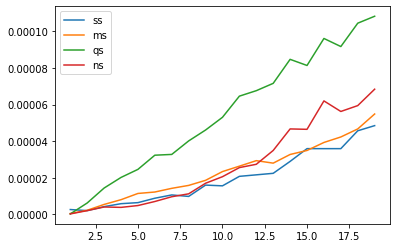

In [25]:
x,y = tester(5000,1,20,1)
plt.plot(x,y);
plt.legend(['ss','ms','qs','ns']);

For very small arrays (<10) insert search and selection search beat everyone :)